In [196]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pmdarima import auto_arima
#from prophet import Prophet

In [197]:
# Load the data from a CSV file
df = pd.read_csv("../data/pollofpolls.csv", sep=";")

In [198]:
#df

In [199]:
# Ensure the "Mnd" column is treated as a string (optional but recommended)
df["Mnd"] = df["Mnd"].astype(str)

# Create an empty dictionary for the predictions
predictions = {"Mnd": ["Februar-25", "Mars-25","April-25","Mai-25","Juni-25","Juli-25","August-25","September-25"]}


In [200]:
month_mapping = {
    "Januar": "January", "Februar": "February", "Mars": "March", "April": "April",
    "Mai": "May", "Juni": "June", "Juli": "July", "August": "August",
    "September": "September", "Oktober": "October", "November": "November", "Desember": "December"
}

# Replace Norwegian months with English
df["Mnd"] = df["Mnd"].replace(month_mapping, regex=True)

# Convert to datetime and set the date to the end of the month
df["Mnd"] = pd.to_datetime(df["Mnd"], format="%B-%y").dt.to_period("M").dt.to_timestamp("M")

# Sort values and set index
df = df.sort_values("Mnd")
df.set_index("Mnd", inplace=True)

#print(df)  # Check that dates are correctly formatted at month-end


              Ap  Hoyre   Frp    SV    Sp  KrF  Venstre  MDG  Rodt  Andre
Mnd                                                                      
2021-01-31  26.4   24.7   9.0   7.1  14.7  3.7      3.4  4.1   3.3    3.5
2021-02-28  25.4   24.6   9.3   7.4  15.2  3.9      3.3  4.3   3.5    3.1
2021-03-31  24.4   24.3   9.3   7.8  16.2  3.7      3.5  4.0   3.6    3.2
2021-04-30  23.6   23.5   9.9   8.0  17.5  3.4      2.9  4.3   3.8    3.0
2021-05-31  24.0   22.6  10.3   8.0  16.5  3.8      3.3  4.1   4.3    3.0
2021-06-30  24.5   21.6  10.2   7.8  17.5  3.3      2.9  4.1   5.2    3.0
2021-07-31  24.3   20.0   9.9   7.7  17.6  3.2      3.5  4.5   5.6    3.9
2021-08-31  24.0   20.1  10.3   8.8  14.1  3.6      4.1  5.5   5.2    4.4
2021-09-30  24.4   19.4  11.3   9.2  12.9  4.0      4.7  4.9   5.4    3.8
2021-10-31  26.6   20.7  11.1   8.7  13.3  3.5      4.6  3.7   4.9    3.0
2021-11-30  26.1   21.3  11.2   8.8  12.7  3.2      4.7  3.9   5.4    2.9
2021-12-31  23.0   24.2  11.7   9.5  1

In [201]:
forecasts = {}

# Forecasting from Feb 2025 to Sept 2025 (8 months)
future_dates = pd.date_range(start="2025-02-28", periods=8, freq="ME")
# Train an ARIMA model for each party
for party in ['Ap', 'Hoyre', 'Frp', 'SV', 'Sp', 'KrF', 'Venstre', 'MDG','Rodt', 'Andre']: 
    #model = sm.tsa.ARIMA(df[party], order=(2, 1, 2))  # (p, d, q) values can be tuned
    #results = model.fit()
    auto_model = auto_arima(df[party], seasonal=True, stepwise=True, suppress_warnings=True)
    print(auto_model.order)  # Show best (p, d, q) values

    # Fit the selected model
    model = sm.tsa.ARIMA(df[party], order=auto_model.order)
    results = model.fit()
    
    # Forecast for future dates
    forecast = results.forecast(steps=8)
    forecasts[party] = forecast

# Convert to a DataFrame
forecast_df = pd.DataFrame(forecasts, index=future_dates)
print(forecast_df)

(0, 1, 2)


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


(2, 0, 1)


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


(0, 1, 0)


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


(0, 1, 0)


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


(0, 1, 0)


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


(1, 0, 0)


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


(0, 1, 0)


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


(0, 1, 1)


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


(1, 0, 0)


C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


(0, 1, 0)
                   Ap      Hoyre   Frp   SV   Sp       KrF  Venstre       MDG  \
2025-02-28  20.214023  22.470651  24.1  8.0  5.9  3.519162      4.5  3.285296   
2025-03-31  19.410263  22.834695  24.1  8.0  5.9  3.559861      4.5  3.285296   
2025-04-30  19.410263  23.278986  24.1  8.0  5.9  3.573762      4.5  3.285296   
2025-05-31  19.410263  23.788950  24.1  8.0  5.9  3.578509      4.5  3.285296   
2025-06-30  19.410263  24.349011  24.1  8.0  5.9  3.580131      4.5  3.285296   
2025-07-31  19.410263  24.943021  24.1  8.0  5.9  3.580685      4.5  3.285296   
2025-08-31  19.410263  25.554690  24.1  8.0  5.9  3.580874      4.5  3.285296   
2025-09-30  19.410263  26.167997  24.1  8.0  5.9  3.580938      4.5  3.285296   

                Rodt  Andre  
2025-02-28  5.587839    3.9  
2025-03-31  5.577996    3.9  
2025-04-30  5.570029    3.9  
2025-05-31  5.563580    3.9  
2025-06-30  5.558360    3.9  
2025-07-31  5.554135    3.9  
2025-08-31  5.550716    3.9  
2025-09-30  5.547948

C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

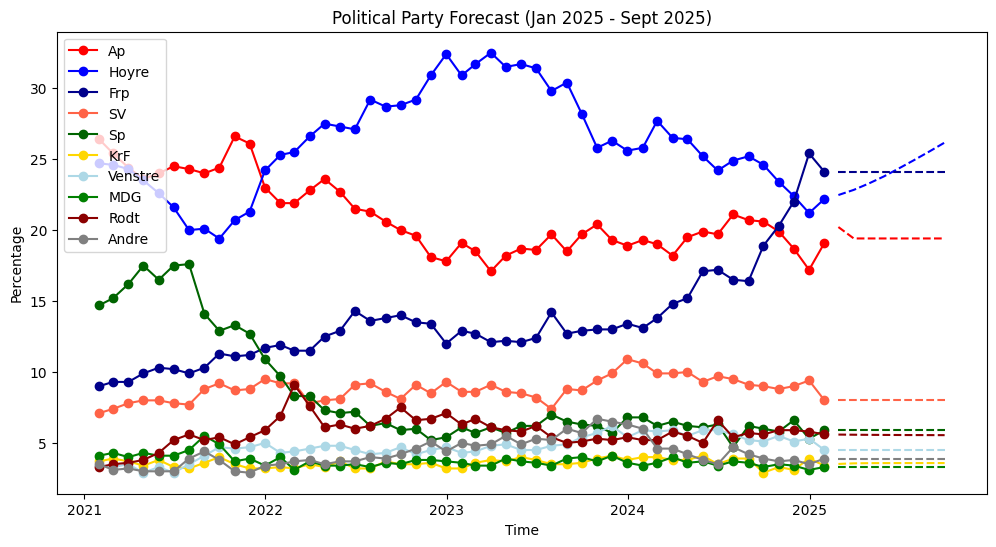

In [202]:
plt.figure(figsize=(12, 6))


# Define a color map for consistency
colors = {
    'Ap': '#FF0000',        # Red
    'Hoyre': '#0000FF',     # Blue
    'Frp': '#00008B',       # Dark Blue
    'SV': '#FF6347',        # Light Red (Tomato)
    'Sp': '#006400',        # Dark Green
    'KrF': '#FFD700',       # Yellow (Gold)
    'Venstre': '#ADD8E6',   # Light Blue
    'MDG': '#008000',       # Green
    'Rodt': '#8B0000',      # Dark Red
    'Andre': '#808080'      # Gray
}


plt.figure(figsize=(12, 6))

for party in ['Ap', 'Hoyre', 'Frp', 'SV', 'Sp', 'KrF', 'Venstre', 'MDG','Rodt', 'Andre']:
    color = colors.get(party, np.random.rand(3,))  # Use predefined color or random if missing
    
    # Plot actual data
    plt.plot(df.index, df[party], marker="o", color=color, label=f"{party}")

    # Plot forecast with the same color
    plt.plot(forecast_df.index, forecast_df[party], linestyle="dashed", color=color)

plt.xlabel("Time")
plt.ylabel("Percentage")
plt.title("Political Party Forecast (Jan 2025 - Sept 2025)")
plt.legend()
plt.show()

In [203]:
forecast_df

,Ap,Hoyre,Frp,SV,Sp,KrF,Venstre,MDG,Rodt,Andre
2025-02-28,20.214023,22.470651,24.1,8.0,5.9,3.519162,4.5,3.285296,5.587839,3.9
2025-03-31,19.410263,22.834695,24.1,8.0,5.9,3.559861,4.5,3.285296,5.577996,3.9
2025-04-30,19.410263,23.278986,24.1,8.0,5.9,3.573762,4.5,3.285296,5.570029,3.9
2025-05-31,19.410263,23.788950,24.1,8.0,5.9,3.578509,4.5,3.285296,5.563580,3.9
2025-06-30,19.410263,24.349011,24.1,8.0,5.9,3.580131,4.5,3.285296,5.558360,3.9
2025-07-31,19.410263,24.943021,24.1,8.0,5.9,3.580685,4.5,3.285296,5.554135,3.9
2025-08-31,19.410263,25.554690,24.1,8.0,5.9,3.580874,4.5,3.285296,5.550716,3.9
2025-09-30,19.410263,26.167997,24.1,8.0,5.9,3.580938,4.5,3.285296,5.547948,3.9
